In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

$$
f_{w,b}(x) = 2x + 3x^2 + 4x^3 + 5
$$

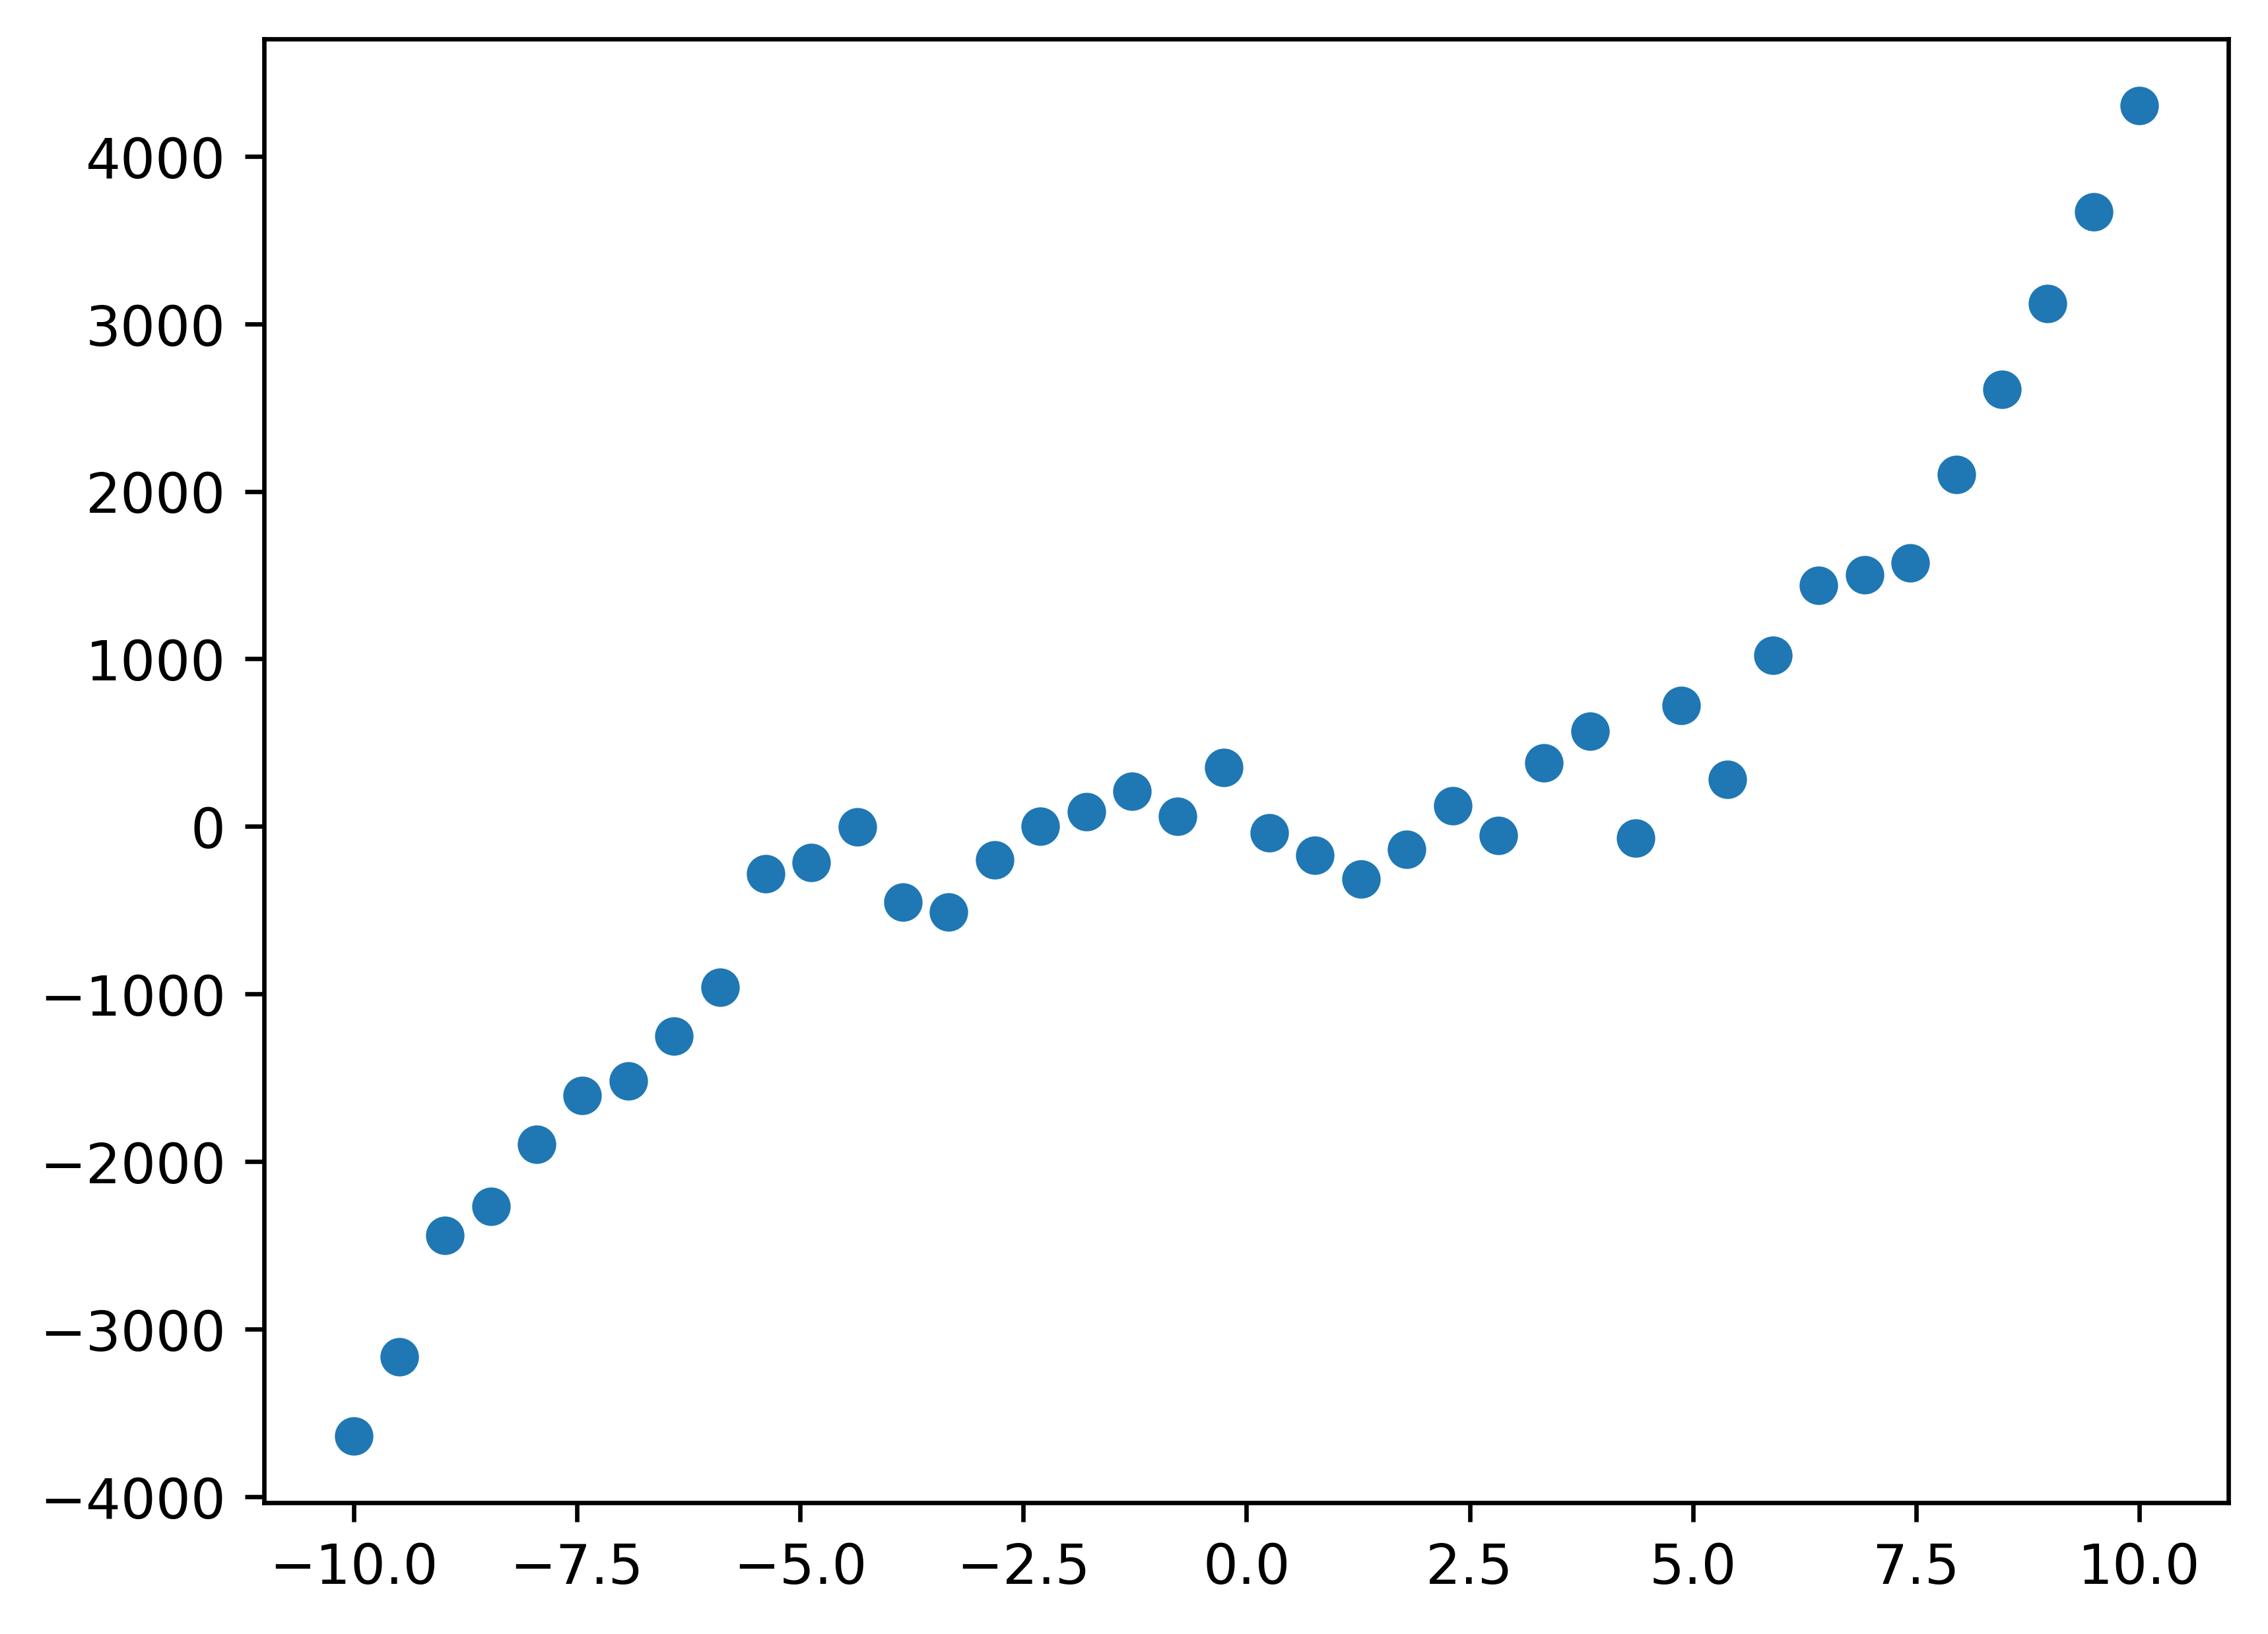

In [28]:
def generateData():
    # 生成数据集
    x = np.linspace(-10, 10, 40)
    # 使用噪声构建y
    y = 2 * x + 3 * x**2 + 4 * x**3 + 5 + np.random.normal(scale=200, size=x.shape)

    data = np.column_stack((x, y))

    # 绘制数据集
    plt.figure(dpi=600)
    plt.scatter(x, y)
    plt.show()
    
    return data

data = generateData()

In [24]:
# 保存数据
def save_data(filename, data):
    np.savetxt(filename, data, delimiter=',')
    print(f"{filename} 已成功创建并写入数据。")

# save_data('data.csv', data)

拟合后的多项式: 73.05 + 0.00*1 + 30.69*x + 93.71*x^2 + 1598.24*x^3
损失: 45165.51


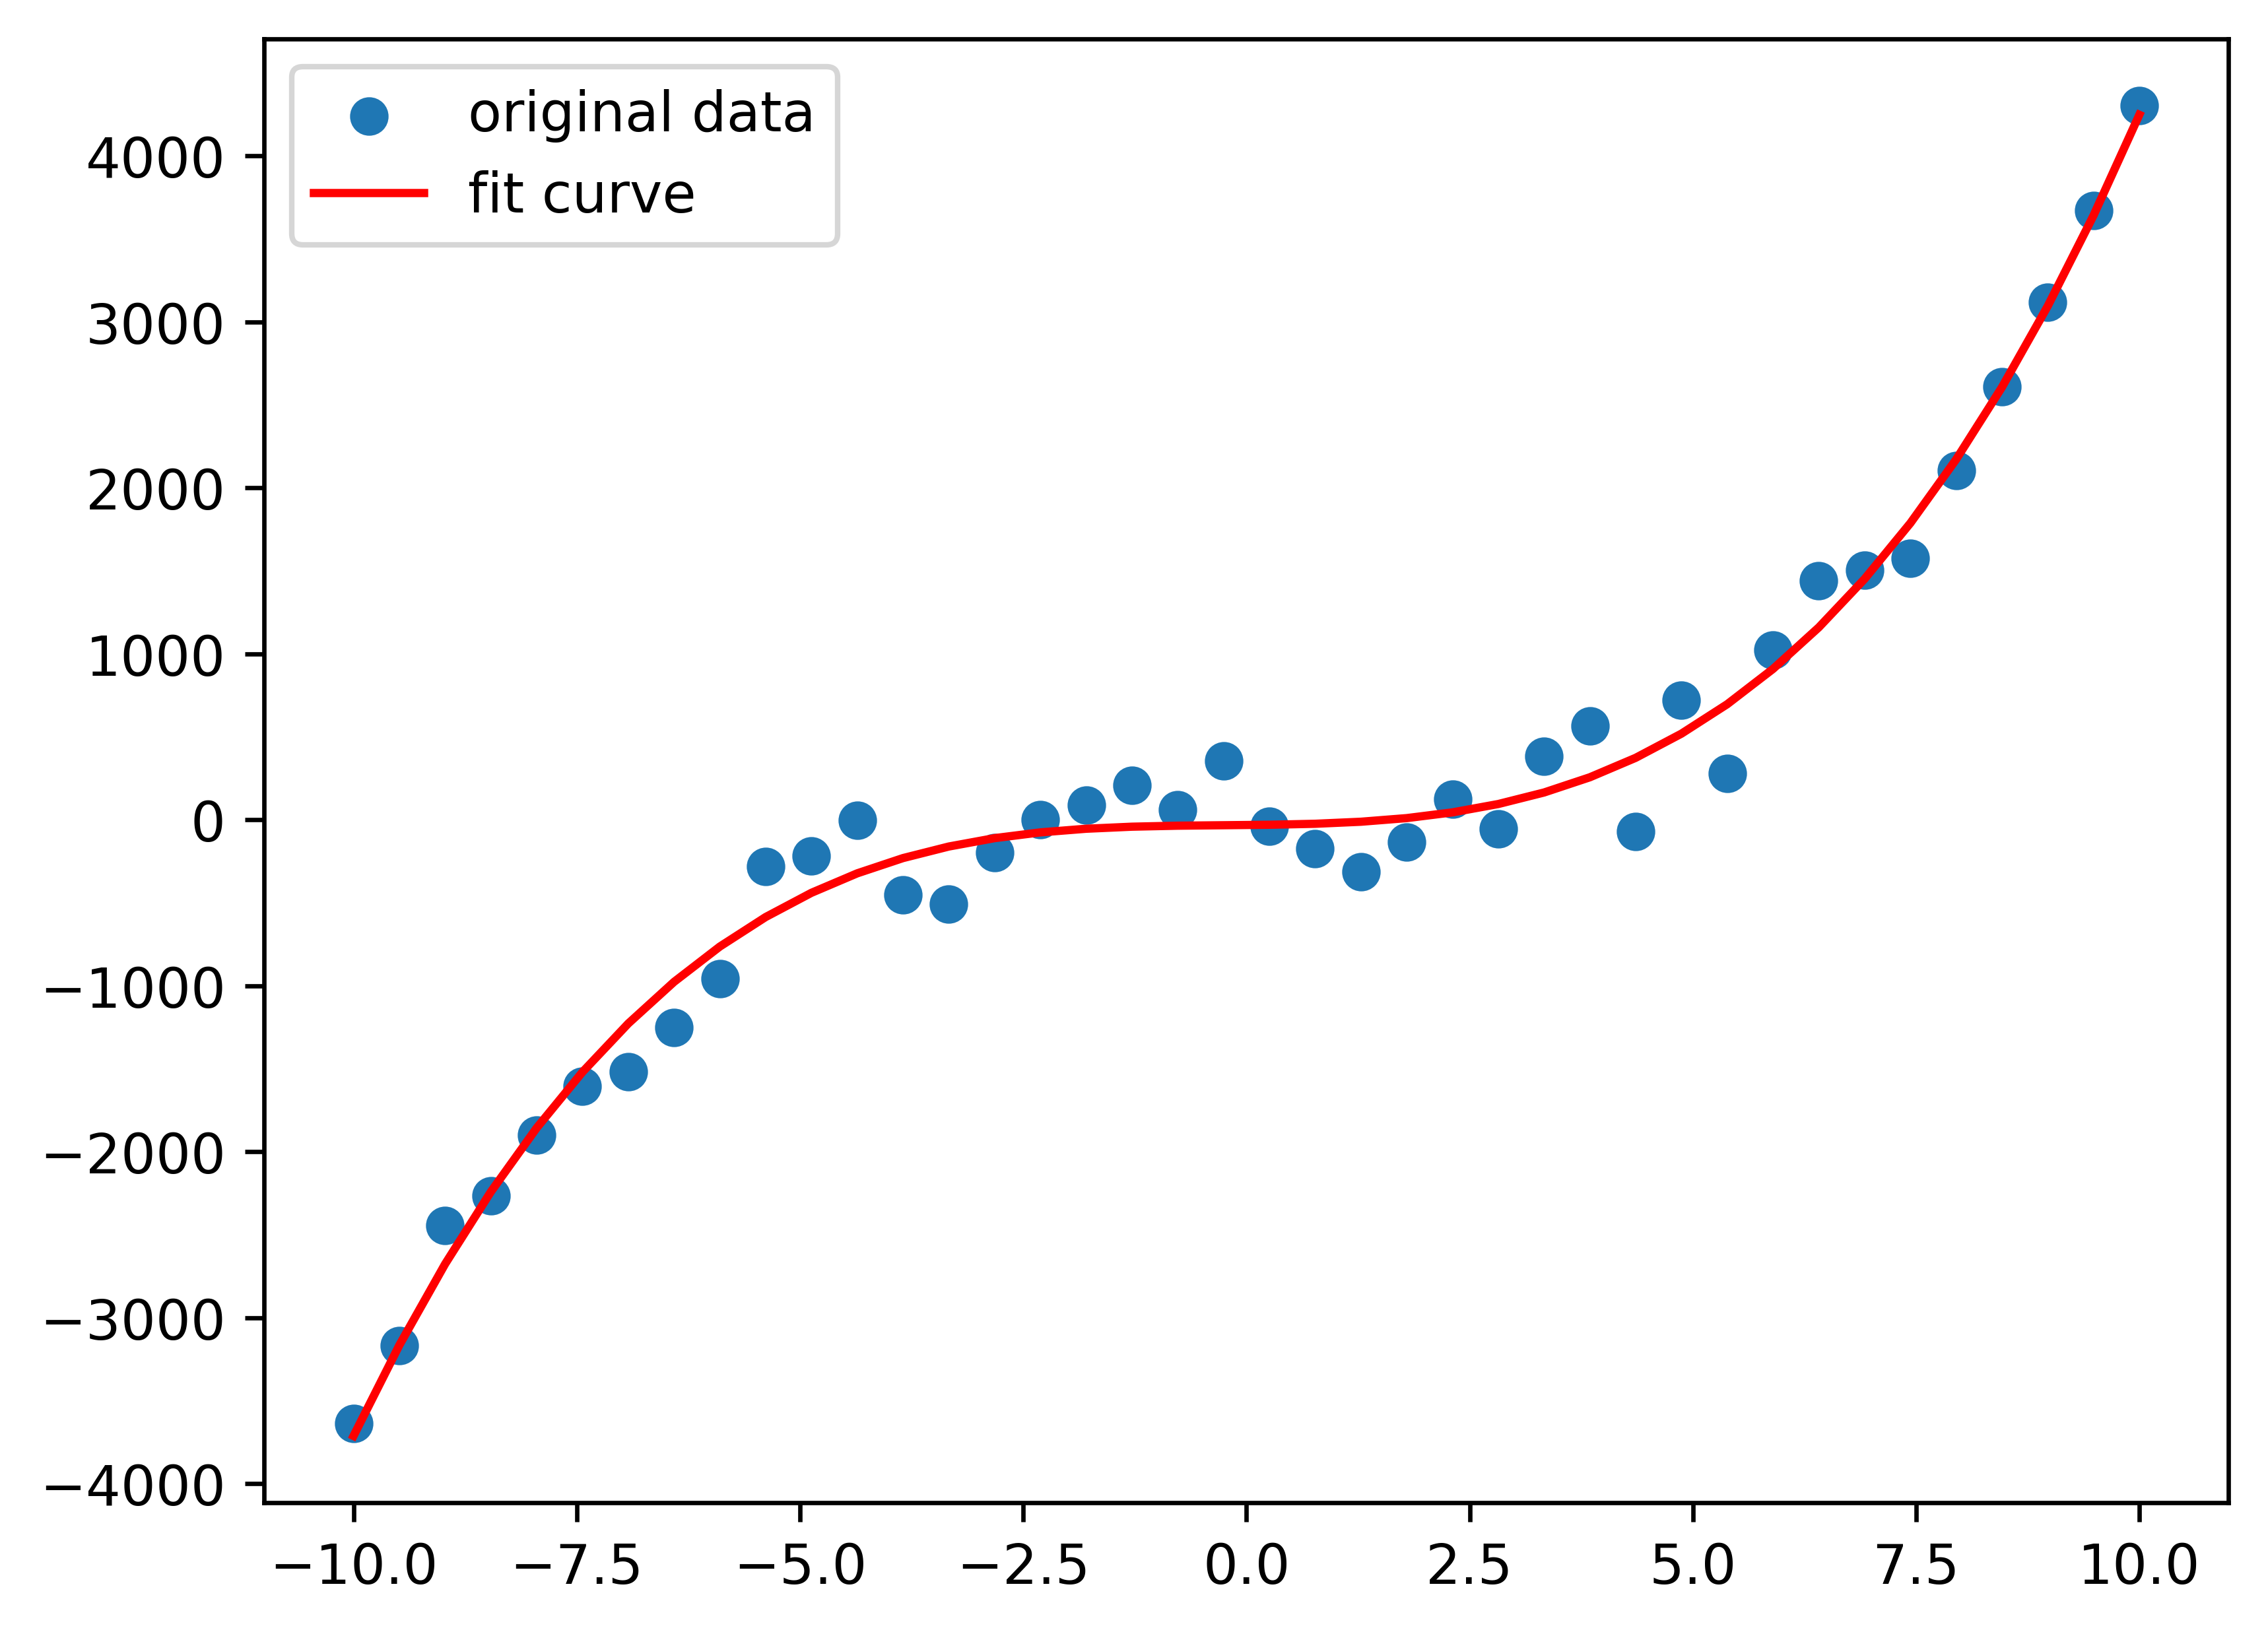

In [38]:
def polynomial_normal_regression(data, degree=3):
    # 生成多项式特征并进行线性回归
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(data[:, 0].reshape(-1, 1), data[:, 1])
    y_pred = model.predict(data[:, 0].reshape(-1, 1))
    
    # 输出拟合后的多项式
    coef = model.named_steps['linearregression'].coef_
    intercept = model.named_steps['linearregression'].intercept_
    poly_features = model.named_steps['polynomialfeatures']
    feature_names = poly_features.get_feature_names_out(['x'])
    
    polynomial = " + ".join(f"{coef[i]:.2f}*{feature_names[i]}" for i in range(len(coef)))
    polynomial = f"{intercept:.2f} + " + polynomial
    print(f"拟合后的多项式: {polynomial}")
    
    # 计算并输出损失
    loss = mean_squared_error(data[:, 1], y_pred)
    print(f"损失: {loss:.2f}")

    # 绘制拟合结果
    plt.figure(dpi=600)
    plt.scatter(data[:, 0], data[:, 1], label='original data')
    plt.plot(data[:, 0], y_pred, label='fit curve', color='red')
    plt.legend()
    plt.show()

polynomial_normal_regression(data)

拟合后的多项式: -31.82 + 0.00*1 + 5.17*x + 2.99*x^2 + 3.93*x^3
损失: 45165.51


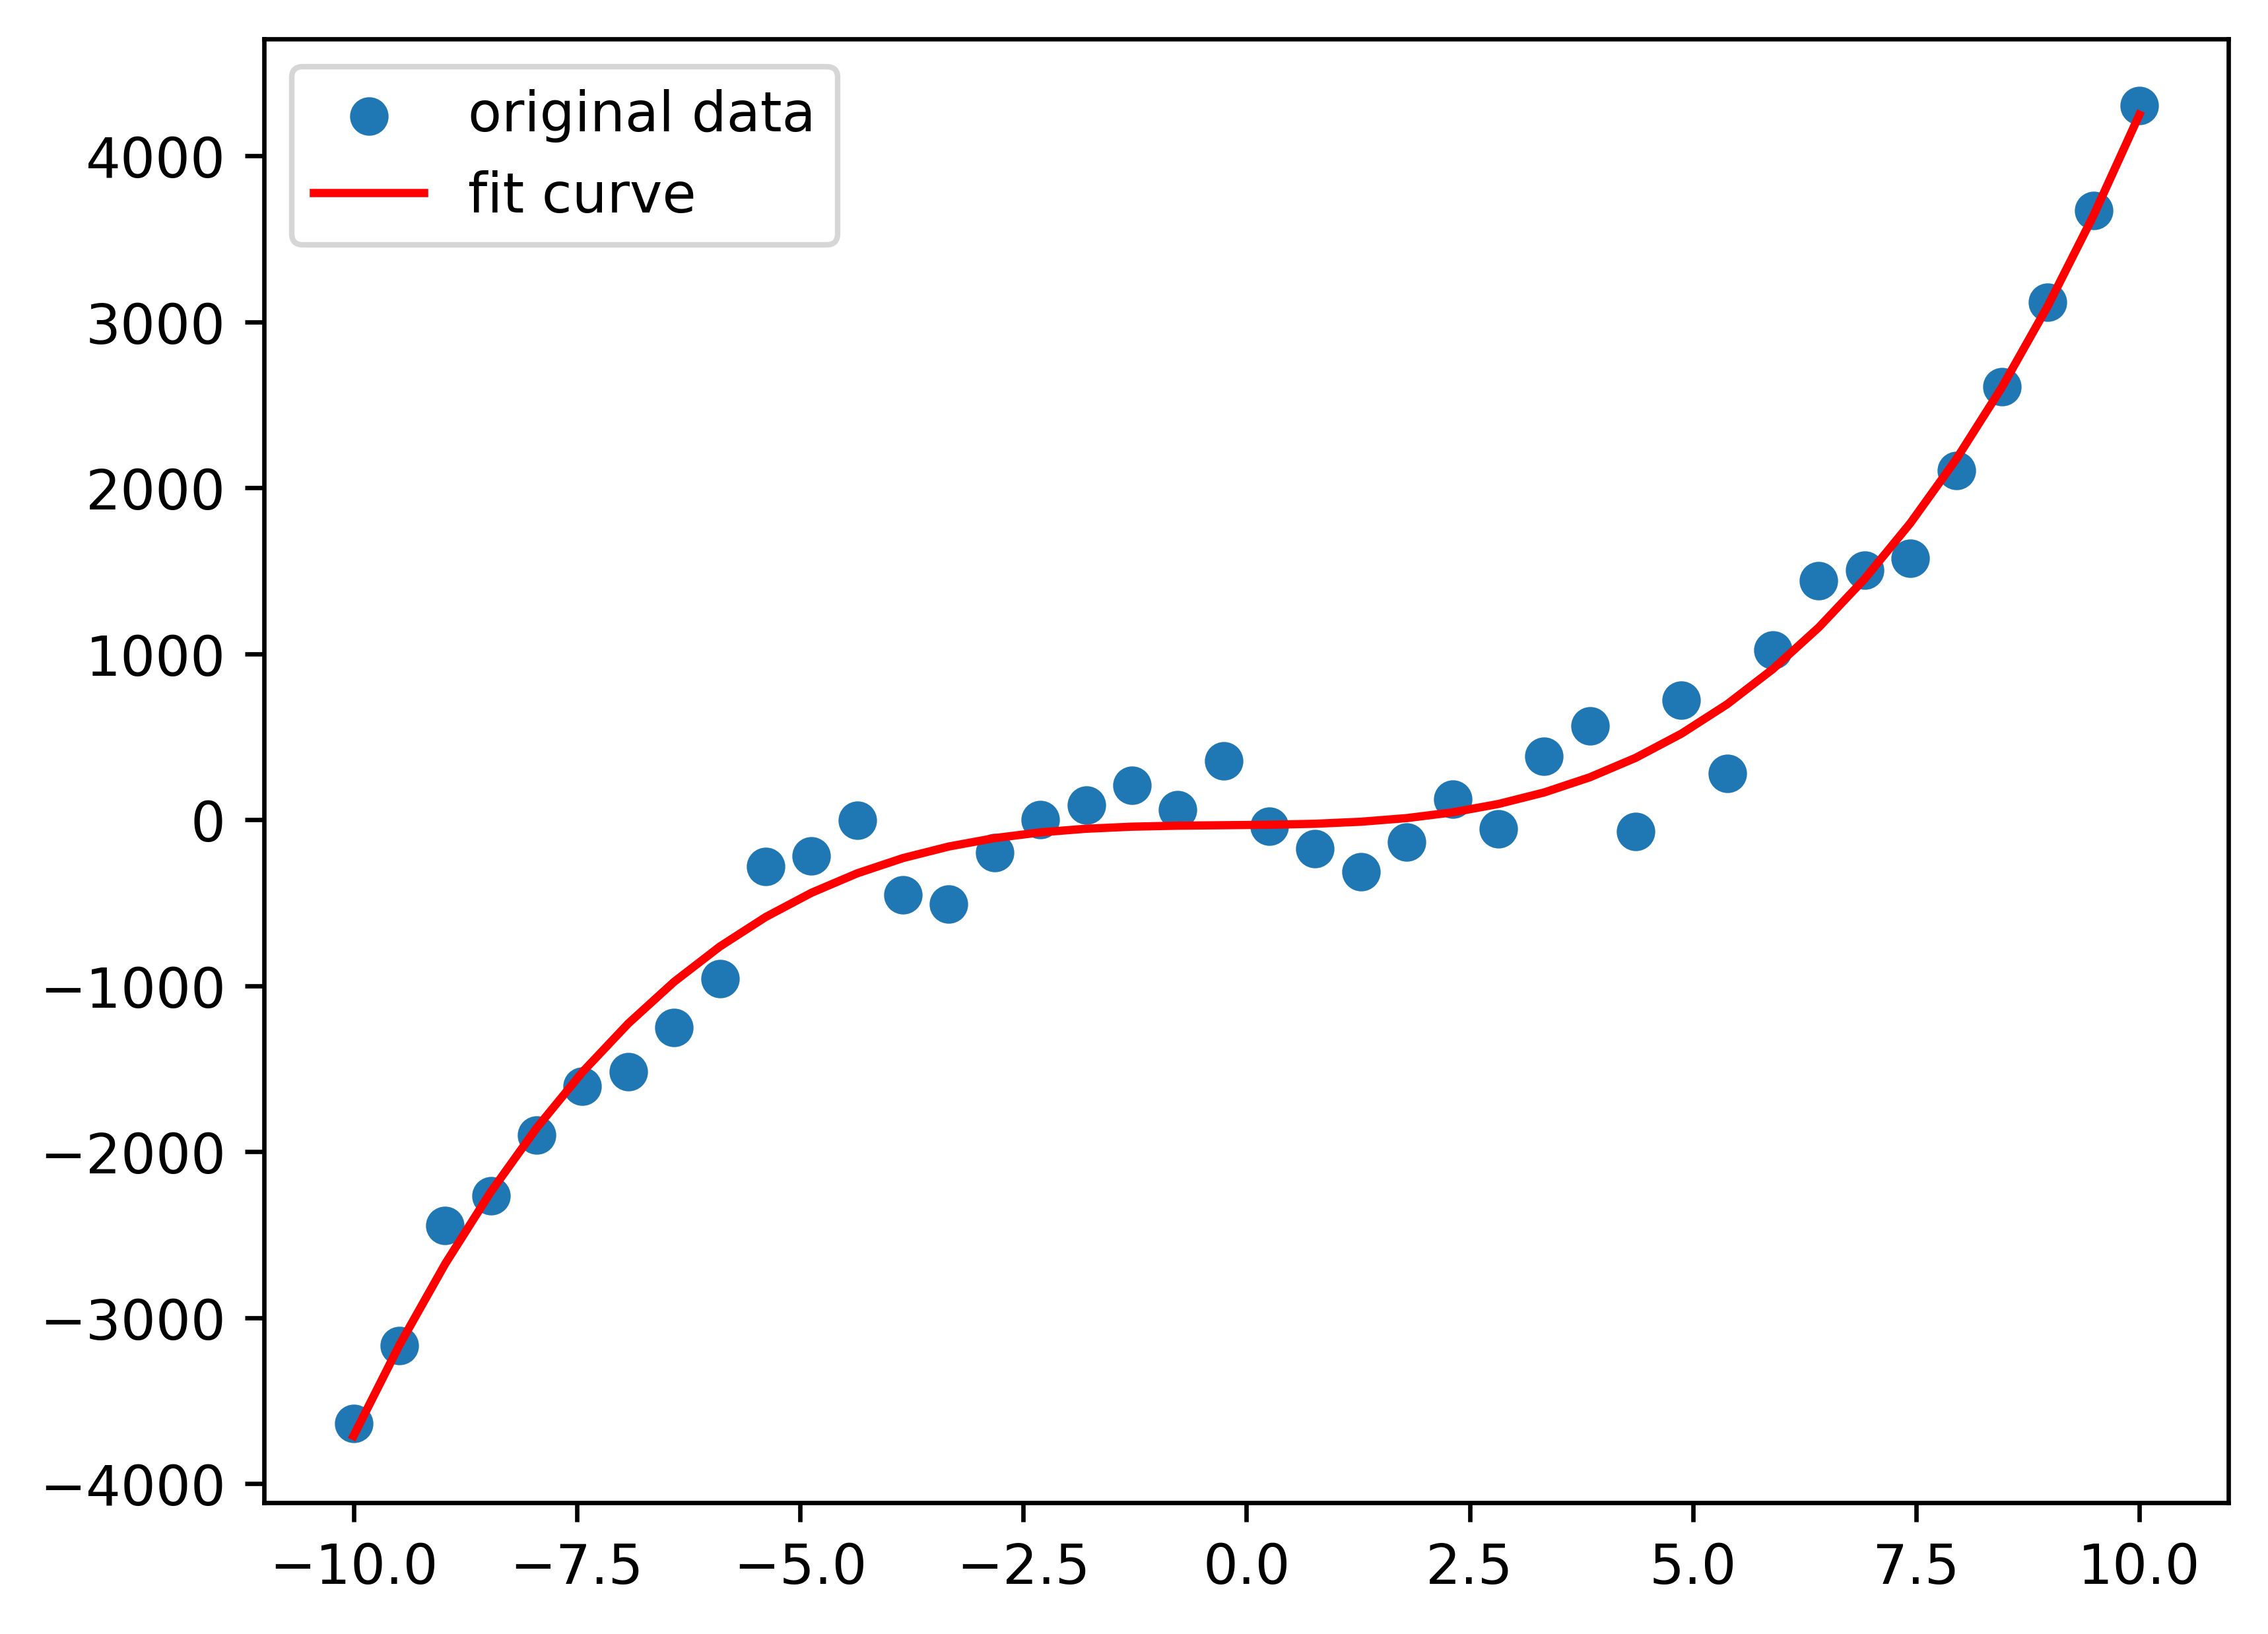

In [47]:
def polynomial_ridge_regression(data, degree=3):
    # 生成多项式特征并进行线性回归
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=0.5))
    model.fit(data[:, 0].reshape(-1, 1), data[:, 1])
    y_pred = model.predict(data[:, 0].reshape(-1, 1))
    
    # 输出拟合后的多项式
    coef = model.named_steps['ridge'].coef_
    intercept = model.named_steps['ridge'].intercept_
    poly_features = model.named_steps['polynomialfeatures']
    feature_names = poly_features.get_feature_names_out(['x'])
    
    polynomial = " + ".join(f"{coef[i]:.2f}*{feature_names[i]}" for i in range(len(coef)))
    polynomial = f"{intercept:.2f} + " + polynomial
    print(f"拟合后的多项式: {polynomial}")
    
    # 计算并输出损失
    loss = mean_squared_error(data[:, 1], y_pred)
    print(f"损失: {loss:.2f}")

    # 绘制拟合结果
    plt.figure(dpi=600)
    plt.scatter(data[:, 0], data[:, 1], label='original data')
    plt.plot(data[:, 0], y_pred, label='fit curve', color='red')
    plt.legend()
    plt.show()

polynomial_ridge_regression(data)